In [1]:
%pip install jupyter pandas sympy
%pip install beautifulsoup4 lxml html5lib
%pip install pint

  Using cached jupyter-1.0.0-py2.py3-none-any.whl (2.7 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 7.1 MB/s eta 0:00:00


In [2]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [3]:
from modsim import *

In [4]:
def bike_to_wellesley():
    bikeshare.olin -= 1
    bikeshare.wellesley += 1

More Than One State Object



In [5]:
def bike_to_wellesley(state):
    state.olin -= 1
    state.wellesley += 1

In [6]:
bikeshare = State(olin=10, wellesley=2)
bike_to_wellesley(bikeshare)

In [7]:
state = bikeshare
state.olin -= 1
state.wellesley += 1

In [8]:
bikeshare1 = State(olin=10, wellesley=2)
bikeshare2 = State(olin=2, wellesley=10)

In [9]:
bike_to_wellesley(bikeshare1)
bike_to_wellesley(bikeshare2)

A docstring is a string in triple quotes that appears at the beginning of a function.

A comment is a line of text that begins with a hash symbol, #.



In [10]:
def bike_to_olin(state):
    """Move one bike from Wellesley to Olin.

    state: bikeshare State object
    """
    # We decrease one state variable and increase the
    # other so the total number of bikes is unchanged.
    state.wellesley -= 1
    state.olin += 1

Negative Bikes <br>
The first line checks whether the number of bikes at Wellesley is zero. If so, it uses a return statement, which causes the function to end immediately, without running the rest of the statements. So if there are no bikes at Wellesley, we return from bike_to_olin without changing the state.



In [11]:
def bike_to_olin(state):
    if state.wellesley == 0:
        return
    state.wellesley -= 1
    state.olin += 1

The first line checks whether the number of bikes at Wellesley is zero. If so, it uses a return statement, which causes the function to end immediately, without running the rest of the statements. So if there are no bikes at Wellesley, we return from bike_to_olin without changing the state.<br>

We can test it by initializing the state with no bikes at Wellesley and calling bike_to_olin.

In [12]:
bikeshare = State(olin=12, wellesley=0)
bike_to_olin(bikeshare)

In [13]:
show(bikeshare)

,state
olin,12
wellesley,0


In [14]:
x = 5

In [15]:
x == 5

True

In [16]:
if x == 5:
    print('yes, x is 5')

yes, x is 5


In [17]:
def bike_to_olin(state):
    if state.wellesley == 0:
        state.wellesley_empty += 1
        return
    state.wellesley -= 1
    state.olin += 1

In [18]:
bikeshare = State(olin=12, wellesley=0,
                  wellesley_empty=0)

In [19]:
bike_to_olin(bikeshare)

In [20]:
show(bikeshare)

,state
olin,12
wellesley,0
wellesley_empty,1


Modify bike_to_wellesley so it checks whether a bike is available at Olin. If not, it should add 1 to olin_empty.

To test it, create a State that initializes olin and olin_empty to 0, run bike_to_wellesley, and check the result.

In [21]:
# Solution

bikeshare = State(olin=0, wellesley=12,
                  olin_empty=0, wellesley_empty=0)

In [22]:
bike_to_olin(bikeshare)

In [23]:
show(bikeshare)

,state
olin,1
wellesley,11
olin_empty,0
wellesley_empty,0


Exercise 1


In [24]:
bikeshare = State(olin=0, wellesley=12,
                  olin_empty=0, wellesley_empty=0)


In [25]:
bike_to_wellesley(bikeshare)


In [26]:
show(bikeshare)

,state
olin,-1
wellesley,13
olin_empty,0
wellesley_empty,0


In [27]:
bikeshare = State(olin=10, wellesley=2,
                  olin_empty=0, wellesley_empty=0)

In [28]:
def run_simulation(state, p1, p2, num_steps):
    # Simulate the given number of time steps.

    # state: State object
    # p1: probability of an Olin->Wellesley customer arrival
    # p2: probability of a Wellesley->Olin customer arrival
    # num_steps: number of time steps
    results = TimeSeries()
    results[0] = state.olin

    for i in range(num_steps):
        step(state, p1, p2)
        results[i+1] = state.olin

    results.plot(label='Olin')
    decorate(title='Olin-Wellesley Bikeshare',
             xlabel='Time step (min)',
             ylabel='Number of bikes')

In [29]:
def step(state, p1, p2):
    # Simulate one time step.

    # state: bikeshare State object
    # p1: probability of an Olin->Wellesley ride
    # p2: probability of a Wellesley->Olin ride
    if flip(p1):
        bike_to_wellesley(state)

    if flip(p2):
        bike_to_olin(state)

In [30]:
def bike_to_wellesley(state):
    # Move one bike from Olin to Wellesley.
    # state: bikeshare State object

    if state.olin == 0:
        state.olin_empty += 1
        return
    state.olin -= 1
    state.wellesley += 1

In [31]:
def bike_to_wellesley(state):
    # Move one bike from Olin to Wellesley.
    # state: bikeshare State object

    state.olin -= 1
    state.wellesley += 1

In [32]:
show(bikeshare)


,state
olin,10
wellesley,2
olin_empty,0
wellesley_empty,0


In [33]:
bikeshare = State(olin=10, wellesley=2,
                  olin_empty=0, wellesley_empty=0)

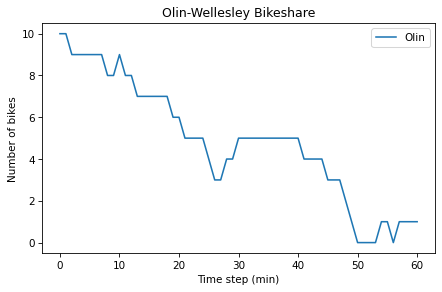

In [34]:
run_simulation(bikeshare, 0.3, 0.2, 60)
